# Contexto da Análise

Acredito que a prática faz a perfeição, então, desde que comecei a gostar e aprender sobre análise dados decide que colocaria em prática o que estou aprendendo. Então, essa analise assim como as outras do meu repositório são meramente para fins de aprendizado e de expor meu trabalho para quem se interessa em aprender comigo ou pelo meu trabalho.

Para isso, a princípio sempre usarei dados abertos fornecidos por governos, universidades e sites especializados nesse quesito como Kaggle.

Em relação ao conjunto de dados que escolhi para esta análise, eu optei por analisar os dados de recebimento de relatos de acidentes do Inmetro de 2006/2018 por pura curiosidade. Já que todo mundo já ouviu falar de alguém que se acidentou com algum produto, seria interessante entrar um pouco mais a fundo nessa questão. Consequentemente, a facilidade de encontrar dados abertos acerca desse histórico também facilita que existam diferentes análises dos acidentes.

Eu como bom cidadão e leigo no assunto, me interessei em conhecer um pouco mais sobre e para isso resolvi fazer uma breve análise acerca dos dados disponíveis.

### Fonte: https://dados.gov.br/dataset/sistema-inmetro-de-monitoramento-de-acidentes-de-consumo-sinmac

### https://dados.gov.br/dataset/sistema-inmetro-de-monitoramento-de-acidentes-de-consumo-sinmac/resource/324736ac-64a8-453c-8339-3bdce0f697f6

## O que a análise revela?

Depois de todas essas análises de fato é possível tirar algumas conclusões interessantes a respeito dos relatos de reclamações recebidos pelo Inmetro. Algumas dessas conclusões são mais previsíveis e outras um tanto que surpreendentes apesar de que para pessoas mais atentas já pudessem ver alguns indícios delas.


Então, Vamos lá.

1. A primeira análise revelou que em relação ao gênero das pessoas que foram vitimas de acidentes os indivíduos que se declararam do sexo feminino tem um numero de ocorrências maior que os indivíduos do sexo masculino. O que também é interessante notar é que os dois gêneros geralmente se envolvem em acidentes com produtos das mesmas famílias: Produtos infantis, eletrodomésticos e utensílios domésticos apenas variando a lugar na lista de incidentes. Mas destacando as diferenças pessoas do sexo se pode notar a presença de incidentes envolvendo veículos entre os homens e cosméticos entre as mulheres. Quando se trata das partes do corpo que foram alvo de lesões no incidente, a maioria dos casos não resultou em nenhum ferimento. No entanto, podemos se pode ver que os incidentes que resultaram em lesão atingem principalmente as mãos, 25% a 50 do corpo ou são internas em ambos os gêneros.


2. Quando olhamos para a faixa etária das pessoas que foram alvo desses incidentes os indivíduos com idade entre 20 a 39 anos são os que mais tem incidentes relatados, seguidos de perto pela faixa de 40 a 59 e 0 a 19 anos.


3. Em relação a subfamília e os produtos que mais causaram incidentes, Fogão, Embalagem metálica, Brinquedo aparecem no topo da lista de maiores relatos. Isso não é nenhuma surpresa levando em conta que que fogão é um produto que lida com elementos de risco (fogo, gás e eletricidade), embalagens metálicas tendem a ser cortantes e crianças podem ser um problema para crianças muito pequenas.


4. A data em que os relatos foram recebidos também trazem informações importantes: entre 2012 a 2014 o Inmetro teve um "boom" no recebimento de relatos de acidentes. Quando analisamos os meses do ano, é estranho notar que há uma variação muito grandes, com seguidas altas e seguidas baixas, sendo o inicio do ano o período com mais relatos. Em relação aos dias, a variação também é muito grande, mas a maior quantidade de relatos se dá no final dos meses.


5. Por fim, temos a localidade onde os acidentes ocorreram: e sem nenhuma surpresa São Paulo é o estado com mais acidentes relatados seguido pelos outros dois grandes estados da região sudestes, Minas Gerais e São Paulo. Isso carece de investigação, mas obviamente também tem relação com o tamanho da população de cada um desses estados, que tem as três maiores populações do país.

# A análise

## Carregando os pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

%reload_ext watermark
%watermark -a "Paulo Henrique Pinto" --iversions

Author: Paulo Henrique Pinto

numpy     : 1.20.1
pandas    : 1.2.4
matplotlib: 3.2.1
seaborn   : 0.11.1



## Importando o conjunto de dados

In [2]:
# Carregando o conjunto de dados
dataset = pd.read_csv("Sinmac2006-2018.csv",
                      sep= ';',
                      encoding = 'utf-8',
                      engine = 'python',
                      error_bad_lines=False)

In [3]:
dataset.shape

(2948, 15)

In [4]:
# Primeira visualização do conjunto de dados
dataset.head(10)

,DataRecebimentoRelato,Família,Subfamília,Produto,Modelo,Marca,Lesão,ParteDoCorpo,Idade,Sexo,Estado,NívelEscolaridade,AtendimentoMédico,AusênciaTrabalho,TipoDeEntrada
0,01/01/2002,Produto químico,Saneante,Formol,NI,NI,Intoxicação,Boca,38,F,PB,NI,Sim,Não,Link Acidentes de Consumo
1,18/03/2005,Produto infantil,Brinquedo,Jogo,Pula Macaco,Estrela,Perfuração,Globo ocular,8,M,SP,NI,Sim,Não,Link Acidentes de Consumo
2,30/01/2006,Artigo escolar,Artigo para escrever,Grafite,NI,Pentel,Contusão,Globo ocular,9,M,DF,Fundamental completo,Sim,Sim,Link Acidentes de Consumo
3,17/10/2006,Vestuário,Calçado,Sapato,NI,West Coast,Contusão,Braço (Parte superior),38,M,RS,Médio completo,Sim,Sim,Link Acidentes de Consumo
4,20/10/2006,Alimento,Panificação e biscoitos,Biscoito,NI,Parmalat,Sufocamento,Interna,19,M,SP,Superior completo,Não,Não,Link Acidentes de Consumo
5,23/10/2006,Eletrodoméstico,Aparelho para cuidados da pele e cabelo,Aparelho de barbear elétrico,NI,Philips,Choque elétrico,Mão,28,M,RN,Médio completo,Não,Não,Link Acidentes de Consumo
6,24/10/2006,Construção civil,"Material isolante, de acabamento e de vedação",Espuma isolante,Espuma de poliuretano PEGAMIL - PU X30,Anaerobicos Brasil,Outro,Mão,28,M,DF,Pós-graduação,Não,Não,Link Acidentes de Consumo
7,01/11/2006,Cosmético,Alisador de cabelo,Alisador de cabelo,Alisador japonês,Walter Coiffeur,Queimadura,Cabeça,16,F,RJ,Médio completo,Não,Não,Link Acidentes de Consumo
8,02/11/2006,Aparelho elétrico,Instrumento de medição,Multímetro,M5302,NI,Queimadura,Mão,16,M,SP,Médio completo,Não,Não,Link Acidentes de Consumo
9,08/11/2006,Mobiliário,Colchão,Colchão,NI,Ortobom,Luxação/Contusão,Tronco (Parte superior),43,F,DF,Superior completo,Sim,Sim,Link Acidentes de Consumo


In [5]:
# Visualização o conjunto de dados um pouco mais detalhadamente analisando suas variaveis.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DataRecebimentoRelato  2946 non-null   object
 1   Família                2947 non-null   object
 2   Subfamília             2947 non-null   object
 3   Produto                2945 non-null   object
 4   Modelo                 2892 non-null   object
 5   Marca                  2934 non-null   object
 6   Lesão                  2944 non-null   object
 7   ParteDoCorpo           2066 non-null   object
 8   Idade                  2947 non-null   object
 9   Sexo                   2938 non-null   object
 10  Estado                 2947 non-null   object
 11  NívelEscolaridade      2946 non-null   object
 12  AtendimentoMédico      2942 non-null   object
 13  AusênciaTrabalho       2942 non-null   object
 14  TipoDeEntrada          2947 non-null   object
dtypes: object(15)
memory 

In [6]:
# Veficicando suas colunas
dataset.isnull().sum()

DataRecebimentoRelato      2
Família                    1
Subfamília                 1
Produto                    3
Modelo                    56
Marca                     14
Lesão                      4
ParteDoCorpo             882
Idade                      1
Sexo                      10
Estado                     1
NívelEscolaridade          2
AtendimentoMédico          6
AusênciaTrabalho           6
TipoDeEntrada              1
dtype: int64

## Limpeza e Tratamento dos dados

In [7]:
# Como algumas colunas do dataset não vão ser "uteis" nessa análise eu optei por retirá-las.

new_dataset = dataset

new_dataset.drop('AtendimentoMédico', axis=1, inplace=True)
new_dataset.drop('TipoDeEntrada', axis=1, inplace=True)

# Alguns registros no dataset possuem gênero NI (Não informado)
# Eu não teria problema em usar essa informação, mas além de serem poucos registros ainda há algumas inconsistencias neles.

new_dataset.drop(new_dataset[new_dataset.Sexo =='NI'].index, inplace=True)

In [8]:
# Separei a informação da data do recebimento do relato em 3: dia, mes e ano
# como pode ser visto mais a frente essa separação é mais util para meus objetivos

new_dataset[['Dia', 'Mes', 'Ano']] = new_dataset['DataRecebimentoRelato'].str.split('/', expand=True)

new_dataset

,DataRecebimentoRelato,Família,Subfamília,Produto,Modelo,Marca,Lesão,ParteDoCorpo,Idade,Sexo,Estado,NívelEscolaridade,AusênciaTrabalho,Dia,Mes,Ano
0,01/01/2002,Produto químico,Saneante,Formol,NI,NI,Intoxicação,Boca,38,F,PB,NI,Não,01,01,2002
1,18/03/2005,Produto infantil,Brinquedo,Jogo,Pula Macaco,Estrela,Perfuração,Globo ocular,8,M,SP,NI,Não,18,03,2005
2,30/01/2006,Artigo escolar,Artigo para escrever,Grafite,NI,Pentel,Contusão,Globo ocular,9,M,DF,Fundamental completo,Sim,30,01,2006
3,17/10/2006,Vestuário,Calçado,Sapato,NI,West Coast,Contusão,Braço (Parte superior),38,M,RS,Médio completo,Sim,17,10,2006
4,20/10/2006,Alimento,Panificação e biscoitos,Biscoito,NI,Parmalat,Sufocamento,Interna,19,M,SP,Superior completo,Não,20,10,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,14/12/2018,Aparelho elétrico,Máquina industrial,Misturador de ração,Misturador de ração,Siltomac,Corte,Dedo da mão,53,M,GO,NI,Sim,14,12,2018
2941,15/12/2018,Mobiliário,Cama,Cama,NI,Studio do sono,Não houve,NaN,43,F,RJ,NI,Não,15,12,2018
2945,21/12/2018,Serviço,Serviço automotivo,Abastecimento,NI,Trelrium Combustíveis,Não houve,NaN,68,M,PR,NI,Não,21,12,2018
2946,23/12/2018,Serviço,Serviço automotivo,Abastecimento,NI,Assis Brasil,Não houve,NaN,56,F,RS,NI,Não,23,12,2018


In [9]:
# segundo os metadados do codigo, sempre que o acidente não resultar em lesão o registro é preenchido como "NA"
# Para não perder uma grande quantidade de dados eu preferi mudar a classificação deles para "Não resultante em lesão"

new_dataset.ParteDoCorpo.fillna('Não resultante em lesão', inplace=True)

In [10]:
# retirando linha em que há valores ausentes do dataset
# Como são poucos a retirada deles não terá grande impacto na análise

new_dataset.dropna(inplace=True)

In [11]:
# Verificando se ainda há algum registro nulo.

new_dataset.isnull().sum()

DataRecebimentoRelato    0
Família                  0
Subfamília               0
Produto                  0
Modelo                   0
Marca                    0
Lesão                    0
ParteDoCorpo             0
Idade                    0
Sexo                     0
Estado                   0
NívelEscolaridade        0
AusênciaTrabalho         0
Dia                      0
Mes                      0
Ano                      0
dtype: int64

In [12]:
# Ao final da Limpeza e tratamento dos dados esse é o tamanho do novo conjunto de dados.

new_dataset.shape

(2754, 16)

## Análise Exploratória

## Gênero

In [13]:
# Verificando a distribuição dos gêneros do conjunto de dados

new_dataset.value_counts('Sexo')

Sexo
F    1435
M    1319
dtype: int64

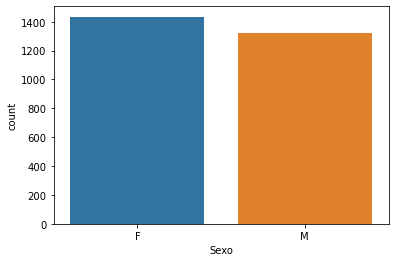

In [14]:
# Representação gráfica da distribuição dos gêneros do conjunto de dados

sns.countplot(new_dataset['Sexo'])

In [15]:
# para facilitar a análise criei um novo dataframe so com os registro de do gênero e da área da lesão

sexo_lesao = pd.DataFrame(new_dataset, columns=['Sexo', 'ParteDoCorpo'])

In [16]:
# Lesões nas pessoas do gênero masculino
Masculino = sexo_lesao.loc[sexo_lesao['Sexo']=='M']

# Lesões nas pessoas do gênero feminino
Feminino = sexo_lesao.loc[sexo_lesao['Sexo']=='F']

In [17]:
# Lesões nas pessoas do gênero masculino

Masculino.value_counts().head(10)

Sexo  ParteDoCorpo           
M     Não resultante em lesão    416
      Dedo da mão                131
      Mão                        117
      Interna                     95
      25-50% do corpo             84
      Cabeça                      56
      Face                        54
      Pé                          47
      Boca                        39
      Tronco (Parte superior)     31
dtype: int64

In [18]:
# Lesões nas pessoas do gênero feminino

Feminino.value_counts().head(10)

Sexo  ParteDoCorpo           
F     Não resultante em lesão    359
      Dedo da mão                217
      Mão                        150
      25-50% do corpo            103
      Interna                    101
      Cabeça                      61
      Face                        59
      Pé                          55
      Boca                        39
      Perna (Parte superior)      31
dtype: int64

In [19]:
sexo_familia = pd.DataFrame(new_dataset, columns=['Sexo', 'Família'])

# Produtos que mais causaram incedentes nas pessoas do gênero masculino
Masculino = sexo_familia.loc[sexo_familia['Sexo']=='M']

# Produtos que mais causaram incedentes nas pessoas do gênero feminino
Feminino = sexo_familia.loc[sexo_familia['Sexo']=='F']

In [20]:
# Família de produtos que mais causaram incedentes nas pessoas do gênero masculino

Masculino.value_counts().head(10)

Sexo  Família            
M     Produto infantil       229
      Eletrodoméstico        174
      Utensílio doméstico    148
      Veículo                132
      Aparelho elétrico      116
      Embalagem              102
      Mobiliário              90
      Serviço                 89
      Alimento                49
      Construção civil        43
dtype: int64

In [21]:
# Família de produtos que mais causaram incedentes nas pessoas do gênero feminino

Feminino.value_counts().head(10)

Sexo  Família            
F     Eletrodoméstico        254
      Produto infantil       213
      Utensílio doméstico    197
      Embalagem              168
      Mobiliário              92
      Alimento                65
      Serviço                 65
      Cosmético               57
      Aparelho elétrico       51
      Vestuário               43
dtype: int64

## Idade

In [22]:
# Precisei fazer duas alterações no conjunto e para isso usei um novo conjunto secundario para não alterar o que esta sendo usado:
# 1) Como havia grande quantidade idades não informada precisei desconsiderar essa informação da análise
# 2) Precisei desconsiderar a idade "1,8" que estava presente no conjunto, pois, ela sempre gerava algum problema

new_dataset2 = new_dataset

new_dataset2.drop(new_dataset2.loc[new_dataset2['Idade']=='NI'].index, inplace=True)
new_dataset2.drop(new_dataset2.loc[new_dataset2['Idade']=='1,8'].index, inplace=True)

new_dataset2['Idade'] = new_dataset2['Idade'].astype('int64', errors='ignore')

new_dataset2.Idade.value_counts().head(10)

1     96
35    74
3     63
32    63
33    61
29    59
37    58
30    57
34    56
42    54
Name: Idade, dtype: int64

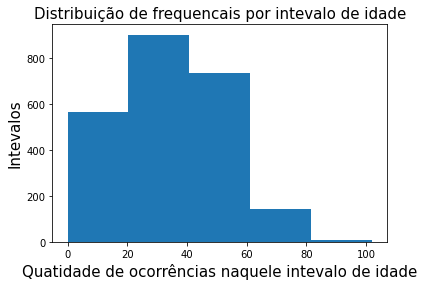

In [23]:
# Histograma da distribuição de frequencia das idades de pessoas vitimas de acidentes

plt.hist(data=new_dataset2, bins=5, x='Idade')
plt.title("Distribuição de frequencais por intevalo de idade", fontsize = 15)
plt.xlabel("Quatidade de ocorrências naquele intevalo de idade", fontsize = 15)
plt.ylabel("Intevalos", fontsize = 15)
plt.show()

## Família

In [24]:
# Distribuição das ocorrencias de acidentes por família de produto

new_dataset['Família'].value_counts()

Produto infantil        352
Eletrodoméstico         335
Utensílio doméstico     273
Embalagem               251
Mobiliário              160
Veículo                 154
Serviço                 149
Aparelho elétrico       144
Alimento                110
Construção civil         69
Vestuário                62
Higiene pessoal          57
Cosmético                53
Produto para a saúde     51
Produto esportivo        31
Produto químico          30
Artigo de festa          30
Medicamento              25
Artigo escolar           12
Name: Família, dtype: int64

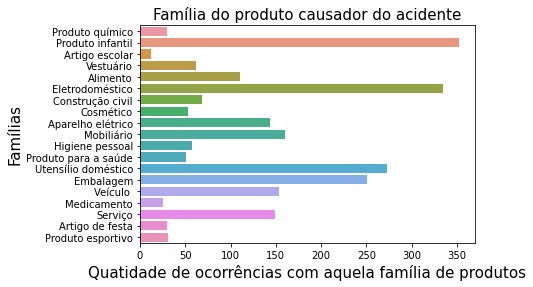

In [25]:
# Representação gráfica da distribuição das ocorrencias de acidentes por família de produto

sns.countplot(data=new_dataset, y='Família', orient = "h")
plt.title("Família do produto causador do acidente", fontsize = 15)
plt.xlabel("Quatidade de ocorrências com aquela família de produtos", fontsize = 15)
plt.ylabel("Famílias", fontsize = 15)
plt.show()

## Sub-Família

In [26]:
# Distribuição das ocorrencias de acidentes por sub-família de produto
# Essas são as 10 maiores ocorrecias

new_dataset['Subfamília'].value_counts().head(10)

Fogão                                  144
Embalagem metálica                     142
Brinquedo                              141
Escada                                  82
Cadeira                                 78
Produto para transporte infantil        76
Embalagem plástica                      73
Mobiliário infantil                     68
Eletrodoméstico portátil de cozinha     60
Calçado                                 47
Name: Subfamília, dtype: int64

## Produto

In [27]:
# Distribuição das ocorrencias de acidentes por produto
# Essas são as 10 maiores ocorrecias

new_dataset['Produto'].value_counts().head(10)

Lata                122
Fogão               108
Escada doméstica     80
Garrafa              56
Carrinho de bebê     43
Berço                39
Sapato               36
Colchão              26
Boneco(a)            25
Refrigerador         25
Name: Produto, dtype: int64

## Data

In [28]:
# Como o conjunto de dados é majoritariamente composto de variaveis qualitativas eu precisei recorrer a outras transformações
# para fazer a análise que eu queria.

anos = list(set(new_dataset['Ano']))

ocorrencias = new_dataset['Ano'].value_counts()

anoOcorrencia = dict(ocorrencias)
        
data = pd.DataFrame({'Ano': anoOcorrencia.keys(), 'Ocorrencias': anoOcorrencia.values()})

data = data.sort_values('Ano', ascending=True)

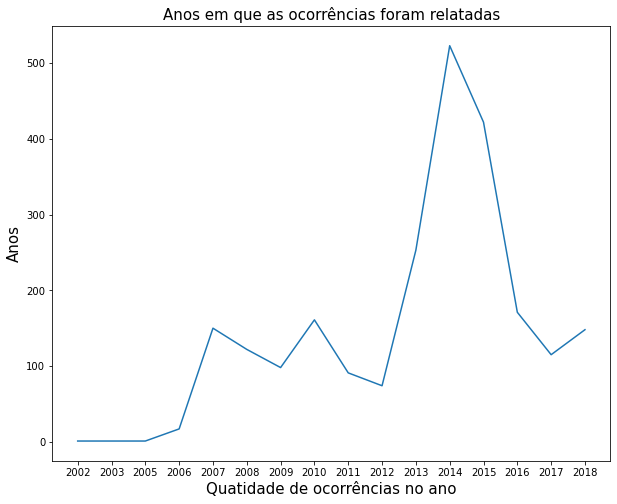

In [29]:
# Gráfico de linhas (lineplot)

plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x= 'Ano', y='Ocorrencias')
plt.title("Anos em que as ocorrências foram relatadas", fontsize = 15)
plt.xlabel("Quatidade de ocorrências no ano", fontsize = 15)
plt.ylabel("Anos", fontsize = 15)
plt.show()

In [30]:
# Como o conjunto de dados é majoritariamente composto de variaveis qualitativas eu precisei recorrer a outras transformações
# para fazer a análise que eu queria.

meses = list(set(new_dataset['Mes']))

ocorrencias = new_dataset['Mes'].value_counts()

mesOcorrencia = dict(ocorrencias)
        
data = pd.DataFrame({'Mes': mesOcorrencia.keys(), 'Ocorrencias': mesOcorrencia.values()})

data = data.sort_values('Mes', ascending=True)

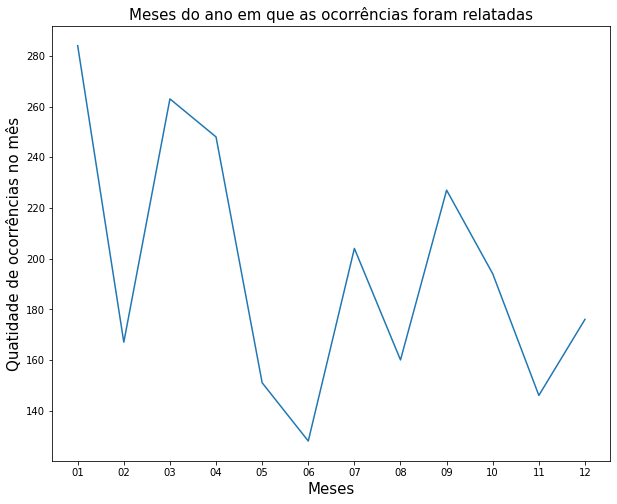

In [31]:
# Gráfico de linhas (lineplot)

plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x='Mes', y='Ocorrencias')
plt.title("Meses do ano em que as ocorrências foram relatadas", fontsize = 15)
plt.xlabel("Meses", fontsize = 15)
plt.ylabel("Quatidade de ocorrências no mês", fontsize = 15)
plt.show()

In [32]:
# Como o conjunto de dados é majoritariamente composto de variaveis qualitativas eu precisei recorrer a outras transformações
# para fazer a análise que eu queria.

dias = list(set(new_dataset['Dia']))

ocorrencias = new_dataset['Dia'].value_counts()

diaOcorrencia = dict(ocorrencias)

diaOcorrencia
        
data = pd.DataFrame({'Dia': diaOcorrencia.keys(), 'Ocorrencias': diaOcorrencia.values()})

data = data.sort_values('Dia', ascending=True)

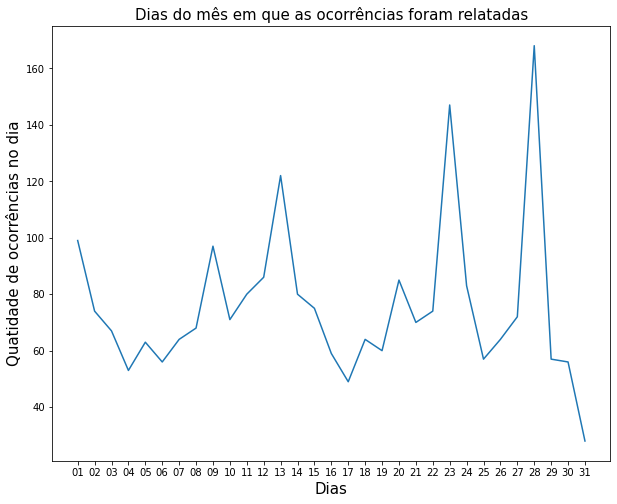

In [33]:
# Gráfico de linhas (lineplot)

plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x='Dia', y='Ocorrencias')
plt.title("Dias do mês em que as ocorrências foram relatadas", fontsize = 15)
plt.xlabel("Dias", fontsize = 15)
plt.ylabel("Quatidade de ocorrências no dia", fontsize = 15)
plt.show()

## Estado

In [34]:
# Para não alterar o dataset que estou usando vou usar mais um secundario.
new_dataset3 = new_dataset

# Além disso, vou excluir aqueles acidentes que em que os estados não foram reltadaos
new_dataset3.drop(new_dataset3[new_dataset3.Estado =='NI'].index, inplace=True)

In [35]:
# Criei uma nova tabela com duas colunas: Ocorrência x Estado

local = dict(new_dataset3['Estado'].value_counts())
Estado = local.keys()
ocorrencias = local.values()


localizacao = pd.DataFrame({'Estado': Estado, 'Ocorrencias': ocorrencias})

In [36]:
# Para apresesntar uma inofmrção mais objetiva preferi apresentar somente os 5 estados com mais ocorrências
# os outros estados ficaram com a nomenclatura "Outros".

principais = localizacao
principais = principais[principais['Ocorrencias'] > 100]

outros = localizacao
outros = localizacao[localizacao['Ocorrencias'] < 100].sum()
outros['Estado'] = 'Outros'

In [37]:
# Para ficar mais facil ainda de vizualizar a informação calculei o percentual de cada estado

nova = principais.append(outros, ignore_index = True)

nova = nova.sort_values(by = 'Ocorrencias', ascending = False)
nova['percentual'] = (nova['Ocorrencias'] / nova['Ocorrencias'].sum()) * 100

In [38]:
# Legenda do gráfico que vai ser criado
labels = [str(nova['Estado'][i])+' '+'['+str(round(nova['percentual'][i],2)) +'%'+']' for i in nova.index]

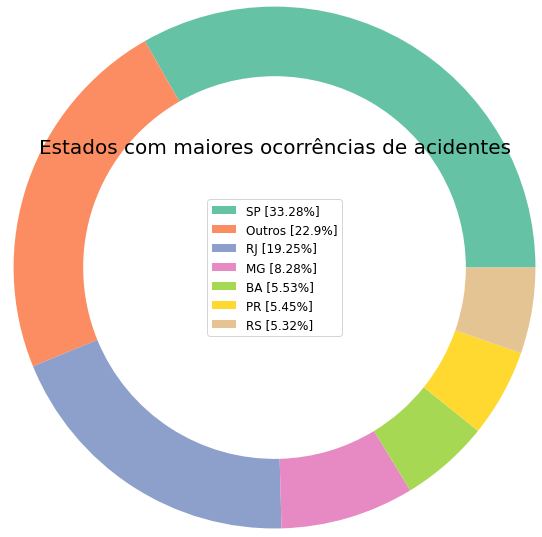

In [50]:
#Gráfico de rosca do percentual da ocorrencia de acidentes por estado

cs = cm.Set2(np.arange(100))

f = plt.figure()

plt.pie(nova['Ocorrencias'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Estados com maiores ocorrências de acidentes", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()